# Разведочный анализ данных датасета Stanford Dogs Dataset

Ссылка на исходный датасет - https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset

Классы и количество картинок

In [2]:
import os
import xml.etree.ElementTree as ET

def parse_annotation(filename):
    tree = ET.parse(filename)
    root = tree.getroot()
    
    size = {
        'width': int(root.find('size/width').text),
        'height': int(root.find('size/height').text),
        'depth': int(root.find('size/depth').text)
    }
    
    objects_info = []
    for obj in root.findall('object'):
        object_info = {
        'name': obj.find('name').text,
        'bndbox': {
            'xmin': int(obj.find('bndbox/xmin').text),
            'ymin': int(obj.find('bndbox/ymin').text),
            'xmax': int(obj.find('bndbox/xmax').text),
            'ymax': int(obj.find('bndbox/ymax').text),
        }
        }
        objects_info.append(object_info)
        
    return size, objects_info[0], len(objects_info) == 1

In [3]:
classes = {}
not_alone_count = 0

for dirname, _, filenames in os.walk('/kaggle/input/stanford-dogs-dataset/annotations/Annotation'):
    #print(dirname)
    for filename in filenames:
        _, obj_info, is_alone = parse_annotation(os.path.join(dirname, filename))
        if obj_info['name'] not in classes:
            classes[obj_info['name']] = 0
        classes[obj_info['name']] += 1
        if not is_alone:
            not_alone_count += 1

In [4]:
print(classes)

{'otterhound': 151, 'cocker_spaniel': 159, 'Brittany_spaniel': 152, 'Afghan_hound': 239, 'Maltese_dog': 252, 'schipperke': 154, 'Irish_setter': 155, 'Pekinese': 149, 'golden_retriever': 150, 'vizsla': 154, 'Welsh_springer_spaniel': 150, 'Staffordshire_bullterrier': 155, 'Border_collie': 150, 'Irish_terrier': 169, 'Eskimo_dog': 150, 'pug': 200, 'kelpie': 153, 'Yorkshire_terrier': 164, 'Tibetan_terrier': 206, 'Walker_hound': 153, 'affenpinscher': 150, 'Cardigan': 155, 'English_springer': 159, 'English_foxhound': 157, 'West_Highland_white_terrier': 169, 'Lakeland_terrier': 197, 'Rhodesian_ridgeback': 172, 'Gordon_setter': 153, 'Lhasa': 186, 'curly-coated_retriever': 151, 'beagle': 195, 'Tibetan_mastiff': 152, 'Sussex_spaniel': 151, 'Saint_Bernard': 170, 'toy_terrier': 172, 'standard_poodle': 159, 'Bernese_mountain_dog': 218, 'Pomeranian': 219, 'Ibizan_hound': 188, 'redbone': 148, 'toy_poodle': 151, 'basset': 175, 'Scottish_deerhound': 232, 'miniature_pinscher': 184, 'basenji': 209, 'Borde

In [5]:
print('Число классов:', len(classes))
print('Общее число картинок:', sum(classes.values()))

Число классов: 120
Общее число картинок: 20580


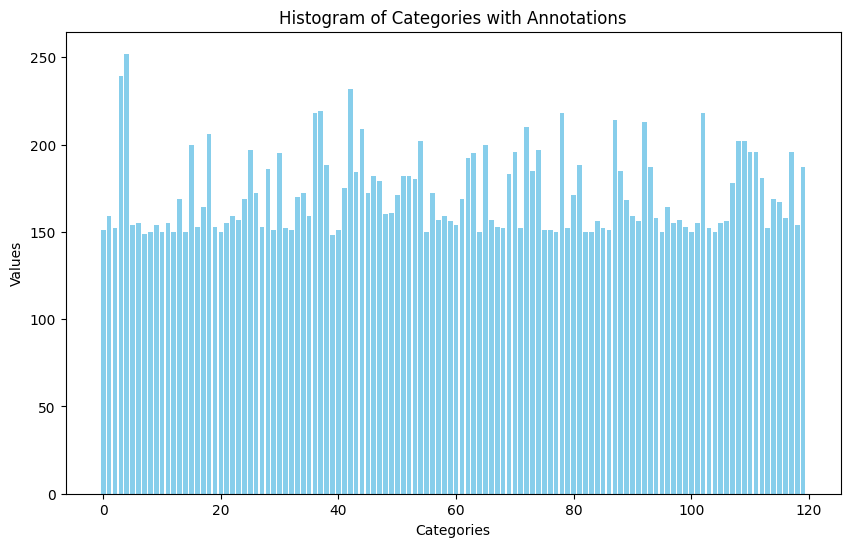

In [6]:
import matplotlib.pyplot as plt

categories = list(classes.keys())
values = list(classes.values())
categories = range(len(values))

# Create the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='skyblue')

# Add annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    #plt.annotate(f'{height}', 
    #             xy=(bar.get_x() + bar.get_width() / 2, height), 
    #             xytext=(0, 3),  # 3 points vertical offset
    #             textcoords="offset points",
    #             ha='center', va='bottom')

# Labeling and titles
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Histogram of Categories with Annotations')

# Display the plot
plt.show()

In [7]:
print(not_alone_count)

1358


In [8]:
sizes = []
objects_info = []

for dirname, _, filenames in os.walk('/kaggle/input/stanford-dogs-dataset/annotations/Annotation'):
    #print(dirname)
    for filename in filenames:
        size, obj_info, is_alone = parse_annotation(os.path.join(dirname, filename))
        sizes.append(size)
        objects_info.append(obj_info)

In [9]:
import numpy as np
from PIL import Image

def parse_image(file_path):
    image = Image.open(file_path).convert('RGB')
    image_array = np.array(image)
    
    return image_array    

In [10]:
img = parse_image('/kaggle/input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/n02085620_10074.jpg')

In [11]:
np_images = []

for dirname, _, filenames in os.walk('/kaggle/input/stanford-dogs-dataset/images/Images'):
    #print(dirname)
    for filename in filenames:
        np_image = parse_image(os.path.join(dirname, filename))
        np_images.append(np_image)

# Среднее и отклонение по каналам:

In [12]:
mean = np.array([0.,0.,0.])
var = np.array([0.,0.,0.])

for channel in range(3):
    mean[channel] = np.mean([(image[:, :, channel] / 255).mean() for image in np_images])
    
for channel in range(3):
    var[channel] += np.mean([((image[:, :, channel] / 255 - mean[channel]) ** 2).mean() for image in np_images])

std = np.sqrt(var)

In [13]:
print('Channels mean:', mean)
print('Channles standrad deviation:', std)

Channels mean: [0.4761392  0.45182742 0.39101657]
Channles standrad deviation: [0.2645457  0.25914122 0.26357948]


Imagenet reference: mean = [0.485, 0.456, 0.406]; std = [0.229, 0.224, 0.225]

# Анализ размеров

In [14]:
sizes[0]

widths = np.array([size['width'] for size in sizes])
heights = np.array([size['height'] for size in sizes])

In [15]:
print(f'Средние размеры: {widths.mean()}, {heights.mean()}')
print(f'Минимальные размеры: {widths.min()}, {heights.min()}')
print(f'Максимальные размеры: {widths.max()}, {heights.max()}')
print(f'Стандартные отклонение: {widths.std()}, {heights.std()}')

Средние размеры: 442.5318756073858, 385.8612244897959
Минимальные размеры: 97, 100
Максимальные размеры: 3264, 2562
Стандартные отклонение: 142.78883844792003, 124.86041256812877


 # Анализ бибоксов

In [16]:
bb_widths = np.array([object_info['bndbox']['xmax']- object_info['bndbox']['xmin']for object_info in objects_info])
bb_heights = np.array([object_info['bndbox']['ymax']- object_info['bndbox']['ymin']for object_info in objects_info])
bb_part_area = bb_widths * bb_heights / (widths * heights)

In [17]:
print(f'Средние размеры бибокса: {bb_widths.mean()}, {bb_heights.mean()}')
print(f'Минимальные размеры бибокса: {bb_widths.min()}, {bb_heights.min()}')
print(f'Максимальные размеры бибокса: {bb_widths.max()}, {bb_heights.max()}')
print(f'Стандартные отклонение размера бибокса: {bb_widths.std()}, {bb_heights.std()}')

Средние размеры бибокса: 289.04067055393585, 297.6299319727891
Минимальные размеры бибокса: 32, 38
Максимальные размеры бибокса: 2735, 2025
Стандартные отклонение размера бибокса: 128.57469401725226, 119.85033255645293


In [18]:
print(f'Средняя пропорция бибокса к изображению: {bb_part_area.mean()}')
print(f'Минимальная пропорция бибокса к изображению: {bb_part_area.min()}')
print(f'Максимальная пропорция бибокса к изображению: {bb_part_area.max()}')
print(f'Стандартное отклонение пропорции бибокса к изображению: {bb_part_area.std()}')

Средняя пропорция бибокса к изображению: 0.5416294795781317
Минимальная пропорция бибокса к изображению: 0.008874666666666666
Максимальная пропорция бибокса к изображению: 0.9988262910798122
Стандартное отклонение пропорции бибокса к изображению: 0.24675213119433048


Интересных аттрибутов в метаданных обнаружено не было

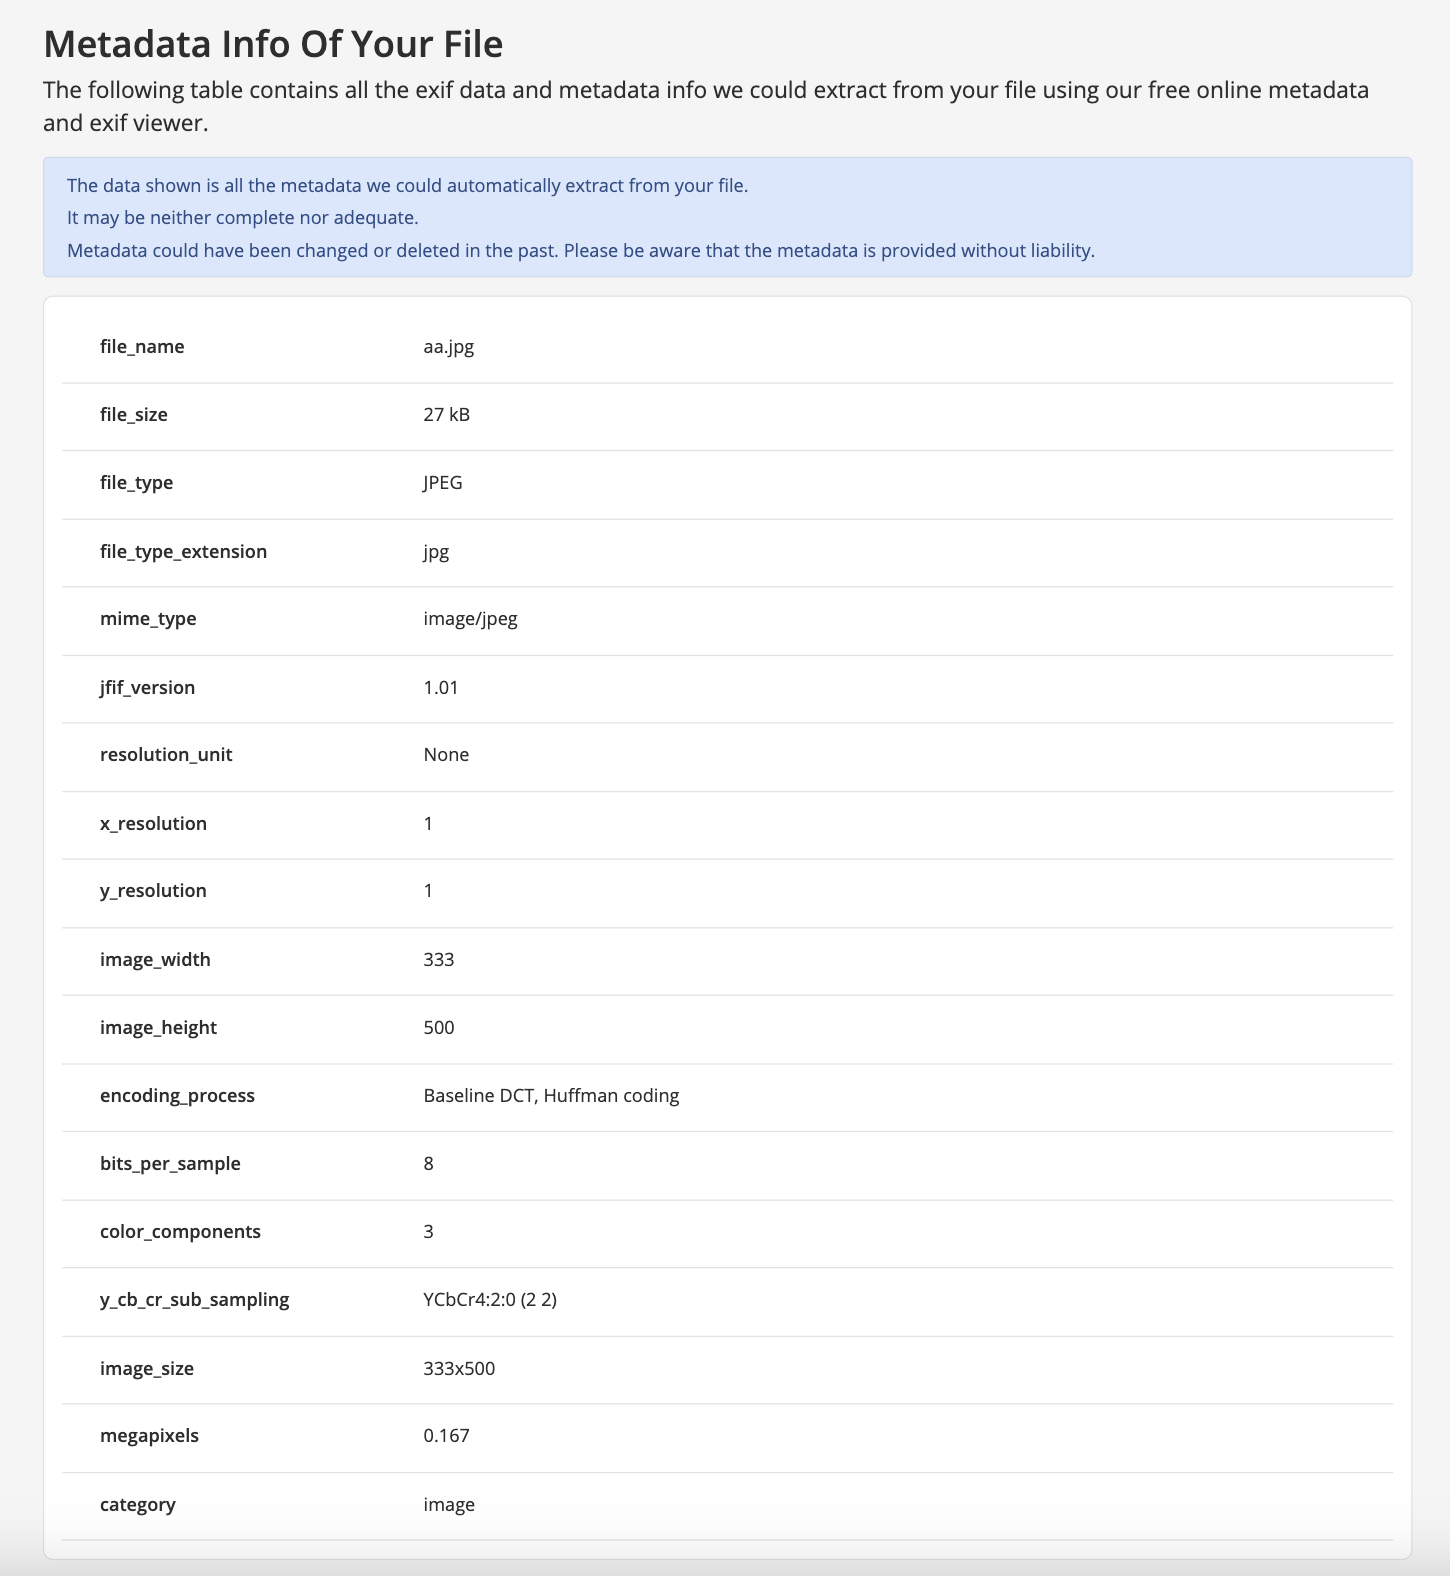

Ниже приведены изображения из датасета - видно что разметка и аттрибуты согласованы с исходным изображением

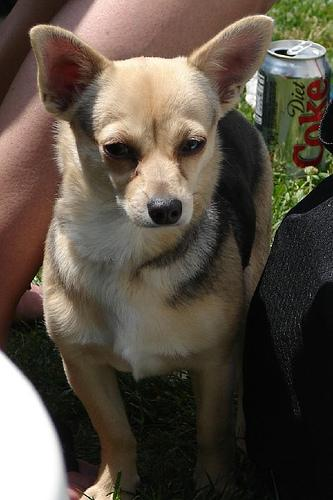

In [19]:
Image.open('/kaggle/input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua/n02085620_10074.jpg').convert('RGB')

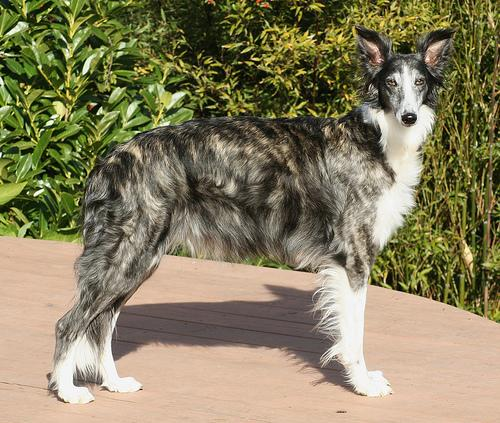

In [20]:
Image.open('/kaggle/input/stanford-dogs-dataset/images/Images/n02090622-borzoi/n02090622_10281.jpg').convert('RGB')

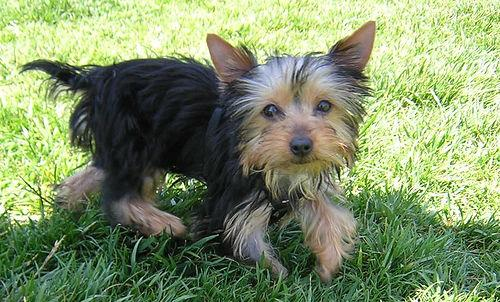

In [21]:
Image.open('/kaggle/input/stanford-dogs-dataset/images/Images/n02094433-Yorkshire_terrier/n02094433_1177.jpg').convert('RGB')

# Выводы

Датасет выглядит довольно чистым - имеется достаточное количество картинок (20580 суммарно, около 150 картинок на каждый класс), изображения согласуются с разметкой, распределение значений по каналам похоже на распределение для ImageNet.

Так же в датасете есть разметка по bounding box'ам - пока что нет уверенности в том, понадобятся ли они, но возможность их использования присутствует.

Количество изображений и согласованность распределений значений с ImageNet благоволит к использованию fine tuning'а модели, основанной на ImageNet - например ResNet18 или ResNet34.

По ресайзу изображений предлагается использовать размер 224 * 224, что является стандартной практикой при работе с моделями ImageNet/ResNet18.

В качестве аугментаций предлагается использовать стандартные аугментация по типу Flip и Crop.

Также предлагается использовать нормализацию относительно гиперпараметров ImageNet'a в случае использования ее как базовой для fine tuning'а. Тогда код трансформации картинок для DL модели будет иметь следующий вид:

In [ ]:
import torch
from torchvision.transforms import v2

transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# img - исходное изображение
img = transforms(img)